# <b>COVID-19 Visualization (2020)</b>

## 1. How it all started -- Coronavirus Pandemic
<div class="image">
  <img style="float: top; margin:10px 0px 10px 0px; width:40%;" src="image_source/covid-19.jpg">
</div>
<style>
.image{
  text-align: center;
}
</style>

<p>COVID-19 coronavirus was firstly reported in China's Wuhan province in December 2019. The World Health Organization (WHO) declared the COVID-19 outbreak a pandemic on March 11, 2020. In the months since, there have been large outbreaks in Iran, South Korea, and Italy. </p>

<p>
This notebook will visualize the spread of COVID-19 across the globe, taking account to before social-distancing, quarantines lockdowns, and after.
</p>

<p>
Big thanks to organizations around the world, this notebook is only possible because the data collected by them. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a> to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.<em> Please note that the COVID-19 information and data are still constantly being updated. This project's data is obtained on March 17, 2020, therefore it should not be regarded the most up-to-date data available.</em>
</p>

In [1]:
# Import libraries required: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import dates

# Read "confirmed_cases_worldwide.csv" into confirmed_cases_worldwide
confirmed_cases_worldwide = pd.read_csv("datasets/confirmed_cases_worldwide.csv")

# View first 10 rows of result:
confirmed_cases_worldwide.head(10)

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [2]:
# Change confirmed_cases_worldwide date into pandas datetime:
confirmed_cases_worldwide.date = pd.to_datetime(confirmed_cases_worldwide.date)
confirmed_cases_worldwide.head()

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


## 2. Visualization of confirm cases throughout the world
<p>The table above presents the total number of confirmed COVID-19 cases globally by date.</p>
<p>However, it is difficult to read and gain insight through table of numbers, so here is a line plot to visualize it.</p>

In [3]:
# Function for plotting line graph
def line_plot(mult_line, title_name, df, x, y):
    """ 
    Plots a line graph 
    :param mult_line: boolean to decide if plot is multiple line or single line
    :param title_name: title name of plot 
    :param df: data to plot 
    :param x: x-axis of plot
    :param y: y-axis of plot
    """

    # Set background and size of plot
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    plt.figure(figsize = (20, 10))

    # plot's title and (x,y) label
    plt.title(title_name)
    plt.xlabel(x)
    plt.ylabel(y)

    # Determine if plot is multiple line or single line
    if mult_line:
        ax = sns.lineplot(data=df)
    else:
        ax = sns.lineplot(data=df, x=x, y=y)
    # Space out x-axis (prevent messy x-axis)
    ax.xaxis.set_major_locator(dates.WeekdayLocator(interval=1))
    plt.show()


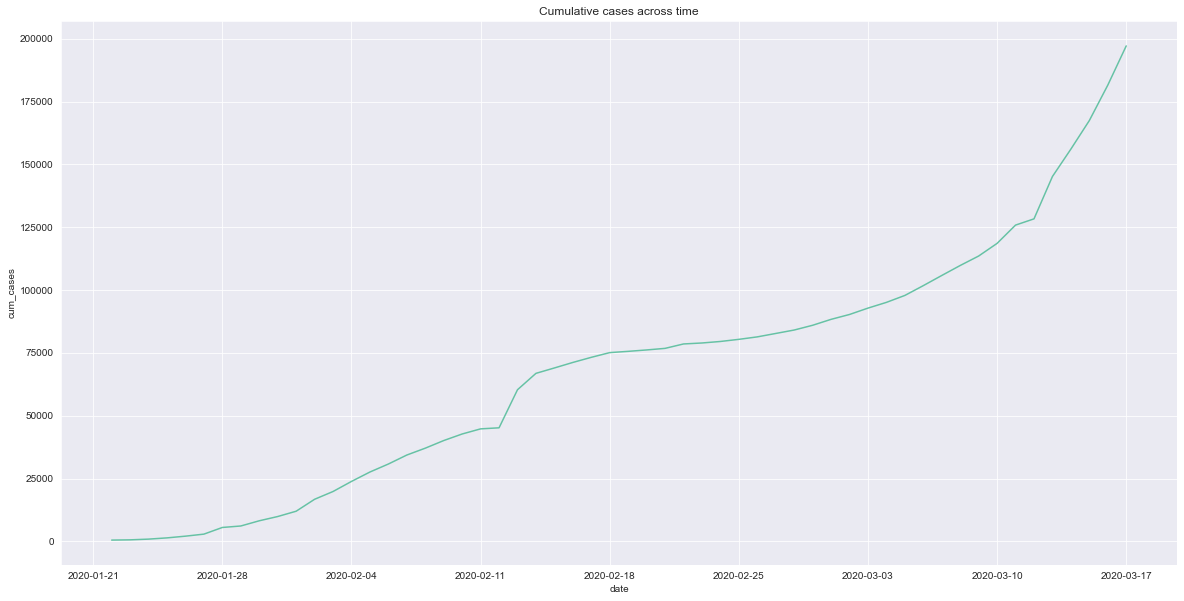

In [4]:
# Line plot of "Cumulative cases vs. date"
line_plot(False, "Cumulative cases across time", confirmed_cases_worldwide, "date", "cum_cases")

## 3. Cases in China against the World
<p>With the total number of verified cases throughout the world reaching 200,000, the y-axis in that plot is rather frightening. Aside from that, strange things are happening: there's an unusual spike in mid-February, then the pace of new cases drops for a bit before picking up again in March. To figure out what's going on, we'll have to delve a little further.</p>
<p>COVID-19 cases were largely concentrated in China early in the pandemic. Let's visualize the trend between confirmed COVID-19 cases in China and the rest of the world to see if we can gain any insight.</p>
<p>

In [5]:
# Read in datasets/confirmed_cases_china_vs_world.csv
confirmed_cases_china_vs_world = pd.read_csv("datasets/confirmed_cases_china_vs_world.csv")
china_vs_world = confirmed_cases_china_vs_world.pivot("date", "is_china", "cum_cases")
china_vs_world.head()

is_china,China,Not China
date,,
2020-01-22,548,7
2020-01-23,643,10
2020-01-24,920,21
2020-01-25,1406,28
2020-01-26,2075,43


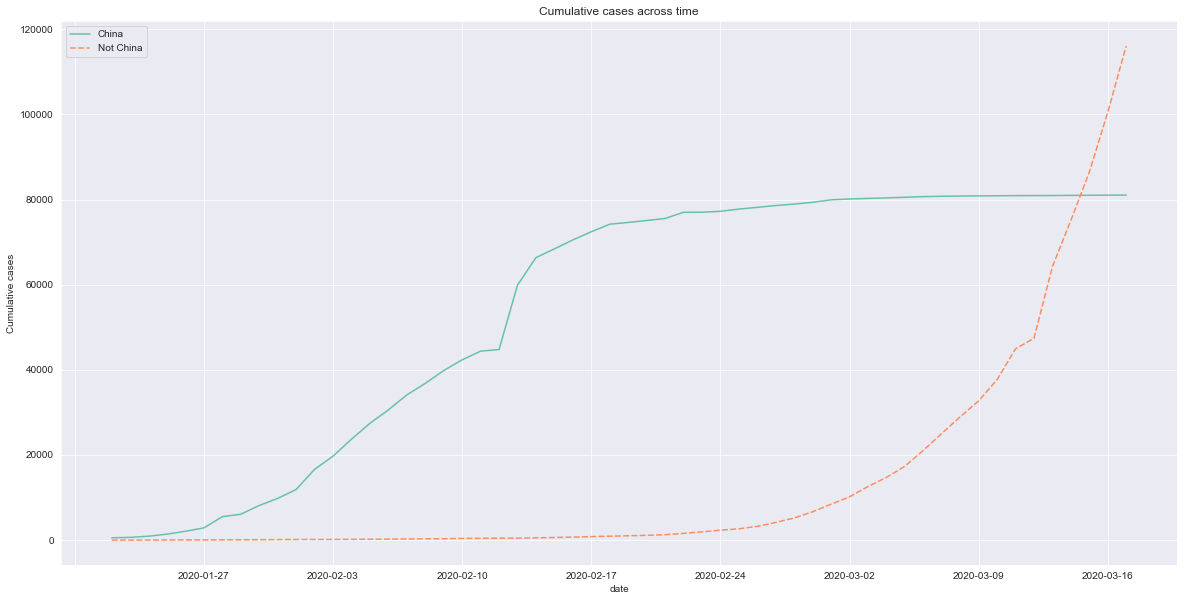

In [6]:
# Line plot of cumulative cases vs. date, (China & rest of the world)
line_plot(True, "Cumulative cases across time", china_vs_world, "Date", "Cumulative cases")